In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read extracted csv
df = pd.read_csv("-- Dataset/psql_extract.csv")

In [3]:
#prepare df for using logarithms
df_log = df.copy()
df_log.columns
columns_to_remove = ["MK_Type", "Sheet", "Client", "Country", "Service_date",
       "Reason_for_Service", "RemScan_Serial", "User_ID", "User_Password"]
for columns in columns_to_remove:
    df_log[columns] = None
df_log = df_log.drop(columns_to_remove, axis=1)
df_log = df_log.dropna(how="all",ignore_index=True)
df_log.head(20)

,Background_Cap,Polystyrene_PS_Cap,SNR_1142_1042_cm1,SNR_2600_2500_cm1,Centre_burst_intensity,Single_beam_spectrum_4200_4500,Single_beam_spectrum_2600_3000
0,5050.0,7500.0,4624.0000,3394.4900,NaN,1.886046,9.475569
1,6050.0,5500.0,4801.5600,3256.8200,NaN,0.818062,8.066072
2,5300.0,4500.0,4657.7200,3589.2600,NaN,1.766476,9.434776
3,4300.0,4400.0,4332.3700,2386.2900,NaN,0.892616,8.060263
4,5142.0,6500.0,4219.0000,3340.0000,NaN,1.912188,9.834543
5,3440.0,2934.0,5987.9700,3124.1400,NaN,1.515998,8.396595
6,450.0,1600.0,2251.0017,739.8580,827308.00,0.314750,6.539012
7,6700.0,NaN,5791.0000,5071.0000,NaN,1.714931,10.275936
8,4500.0,4300.0,4765.1600,2563.0000,NaN,0.924311,7.874819
9,4759.0,4835.0,3268.0000,2655.3600,NaN,1.846676,9.386950


In [4]:
df_log = df_log.replace(np.nan, 0)
df_log.head(20)

,Background_Cap,Polystyrene_PS_Cap,SNR_1142_1042_cm1,SNR_2600_2500_cm1,Centre_burst_intensity,Single_beam_spectrum_4200_4500,Single_beam_spectrum_2600_3000
0,5050.0,7500.0,4624.0000,3394.4900,0.00,1.886046,9.475569
1,6050.0,5500.0,4801.5600,3256.8200,0.00,0.818062,8.066072
2,5300.0,4500.0,4657.7200,3589.2600,0.00,1.766476,9.434776
3,4300.0,4400.0,4332.3700,2386.2900,0.00,0.892616,8.060263
4,5142.0,6500.0,4219.0000,3340.0000,0.00,1.912188,9.834543
5,3440.0,2934.0,5987.9700,3124.1400,0.00,1.515998,8.396595
6,450.0,1600.0,2251.0017,739.8580,827308.00,0.314750,6.539012
7,6700.0,0.0,5791.0000,5071.0000,0.00,1.714931,10.275936
8,4500.0,4300.0,4765.1600,2563.0000,0.00,0.924311,7.874819
9,4759.0,4835.0,3268.0000,2655.3600,0.00,1.846676,9.386950


In [5]:
df_log.columns

Index(['Background_Cap', 'Polystyrene_PS_Cap', 'SNR_1142_1042_cm1',
       'SNR_2600_2500_cm1', 'Centre_burst_intensity',
       'Single_beam_spectrum_4200_4500', 'Single_beam_spectrum_2600_3000'],
      dtype='object')

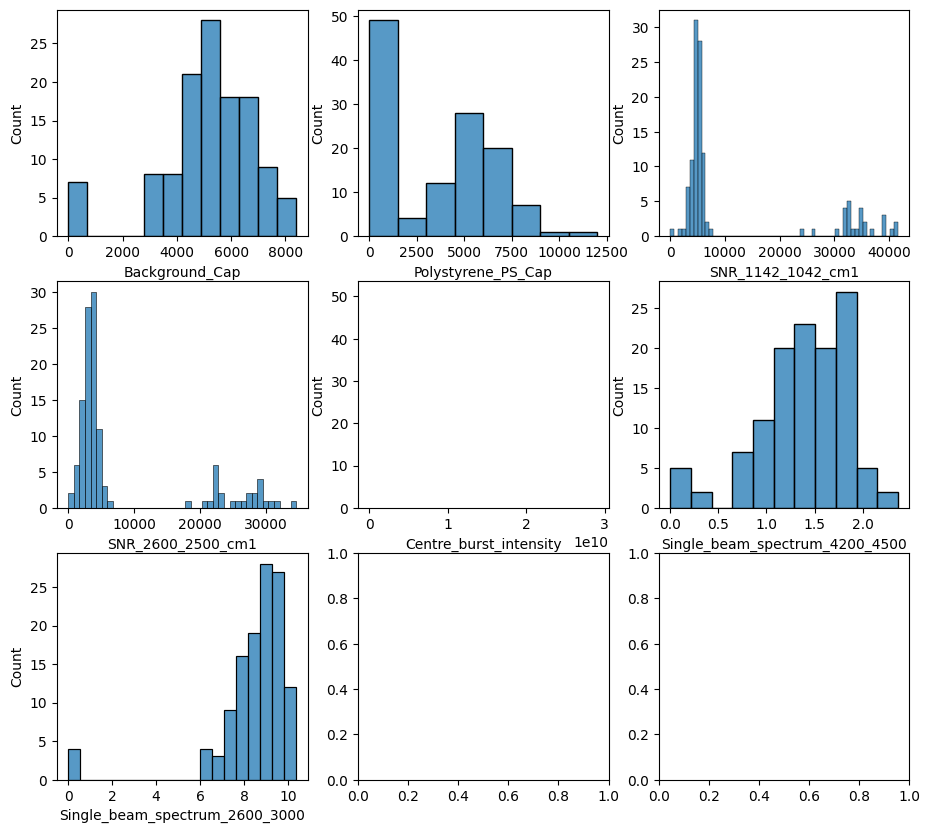

In [6]:
# sns.pairplot(df_log, x_vars= ['Background_Cap', 'Polystyrene_PS_Cap', 'SNR_1142_1042_cm1',
#        'SNR_2600_2500_cm1', 'Centre_burst_intensity',
#        'Single_beam_spectrum_4200_4500', 'Single_beam_spectrum_2600_3000'])

fig, axs = plt.subplots(3, 3, figsize=(11, 10))

sns.histplot(df_log, x='Background_Cap', ax=axs[0,0])
sns.histplot(df_log, x='Polystyrene_PS_Cap', ax=axs[0,1])
sns.histplot(df_log, x='SNR_1142_1042_cm1', ax=axs[0,2])
sns.histplot(df_log, x='SNR_2600_2500_cm1', ax=axs[1,0])
sns.histplot(df_log, x='Centre_burst_intensity', ax=axs[1,1])
sns.histplot(df_log, x='Single_beam_spectrum_4200_4500', ax=axs[1,2])
sns.histplot(df_log, x='Single_beam_spectrum_2600_3000', ax=axs[2,0])
plt.show()

In [7]:
for cols in df_log.columns:
    range = np.max(df_log[cols])-np.min(df_log[cols])
    print (cols,range)

Background_Cap 8400.0
Polystyrene_PS_Cap 12000.0
SNR_1142_1042_cm1 41612.2
SNR_2600_2500_cm1 34642.84
Centre_burst_intensity 29055372667.78097
Single_beam_spectrum_4200_4500 2.366501131819668
Single_beam_spectrum_2600_3000 10.378463473493222


In [8]:
# Calculate the IQR for each column
iqr_dict = {}
q1 = {}
q3 = {}
for column in ["Background_Cap", "Polystyrene_PS_Cap", "SNR_1142_1042_cm1", "SNR_2600_2500_cm1", "Centre_burst_intensity"]:
    q1[column] = np.percentile(df_log[column], 25)
    q3[column] = np.percentile(df_log[column], 75)
    iqr_dict[column] = (q3[column] - q1[column])*1.5
print(iqr_dict)
print(q1)

# Identify the outliers for each column
outlier_indices = []
for column in ["Background_Cap", "Polystyrene_PS_Cap", "SNR_1142_1042_cm1", "SNR_2600_2500_cm1", "Centre_burst_intensity"]:
    print(q1[column],q3[column])
    quartileSet = (q1[column] - iqr_dict[column], q3[column] + iqr_dict[column])
    print(quartileSet)
    outliers = np.where((df_log[column] < quartileSet[0]) | (df_log[column] > quartileSet[1]))[0]
    outlier_indices.extend(outliers)
print(outlier_indices)

# Remove the outliers
df_log = df_log.drop(outlier_indices, axis=0)
df_log.head(20)

{'Background_Cap': 2752.5, 'Polystyrene_PS_Cap': 8700.0, 'SNR_1142_1042_cm1': 2702.4042375000013, 'SNR_2600_2500_cm1': 3192.724125, 'Centre_burst_intensity': 5013404.15625}
{'Background_Cap': 4565.0, 'Polystyrene_PS_Cap': 0.0, 'SNR_1142_1042_cm1': 4525.180125, 'SNR_2600_2500_cm1': 2703.5834999999997, 'Centre_burst_intensity': 21400.0}
4565.0 6400.0
(1812.5, 9152.5)
0.0 5800.0
(-8700.0, 14500.0)
4525.180125 6326.782950000001
(1822.7758874999986, 9029.187187500002)
2703.5834999999997 4832.06625
(-489.14062500000045, 8024.7903750000005)
21400.0 3363669.4375
(-4992004.15625, 8377073.59375)
[6, 14, 31, 46, 105, 120, 121, 14, 46, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 46, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 31, 36, 101, 103, 104, 106, 107, 110, 112, 114, 115, 116, 117]


,Background_Cap,Polystyrene_PS_Cap,SNR_1142_1042_cm1,SNR_2600_2500_cm1,Centre_burst_intensity,Single_beam_spectrum_4200_4500,Single_beam_spectrum_2600_3000
0,5050.0,7500.0,4624.0000,3394.4900,0.00,1.886046,9.475569
1,6050.0,5500.0,4801.5600,3256.8200,0.00,0.818062,8.066072
2,5300.0,4500.0,4657.7200,3589.2600,0.00,1.766476,9.434776
3,4300.0,4400.0,4332.3700,2386.2900,0.00,0.892616,8.060263
4,5142.0,6500.0,4219.0000,3340.0000,0.00,1.912188,9.834543
5,3440.0,2934.0,5987.9700,3124.1400,0.00,1.515998,8.396595
7,6700.0,0.0,5791.0000,5071.0000,0.00,1.714931,10.275936
8,4500.0,4300.0,4765.1600,2563.0000,0.00,0.924311,7.874819
9,4759.0,4835.0,3268.0000,2655.3600,0.00,1.846676,9.386950
10,5255.0,5200.0,4705.0000,4448.0000,0.00,1.865912,10.247940


In [9]:
# Convert the columns to log
df_log["Background_Cap"] = np.log(np.clip(df_log["Background_Cap"], 1, np.inf))
df_log["Polystyrene_PS_Cap"] = np.log(np.clip(df_log["Polystyrene_PS_Cap"], 1, np.inf))
df_log["SNR_1142_1042_cm1"] = np.log(np.clip(df_log["SNR_1142_1042_cm1"], 1, np.inf))
df_log["SNR_2600_2500_cm1"] = np.log(np.clip(df_log["SNR_2600_2500_cm1"], 1, np.inf))
df_log["Centre_burst_intensity"] = np.log(np.clip(df_log["Centre_burst_intensity"], 1, np.inf))

df_log.head(10)

,Background_Cap,Polystyrene_PS_Cap,SNR_1142_1042_cm1,SNR_2600_2500_cm1,Centre_burst_intensity,Single_beam_spectrum_4200_4500,Single_beam_spectrum_2600_3000
0,8.527144,8.922658,8.439015,8.129909,0.0,1.886046,9.475569
1,8.707814,8.612503,8.476696,8.088507,0.0,0.818062,8.066072
2,8.575462,8.411833,8.446281,8.185701,0.0,1.766476,9.434776
3,8.366370,8.389360,8.373870,7.777495,0.0,0.892616,8.060263
4,8.545197,8.779557,8.347353,8.113726,0.0,1.912188,9.834543
5,8.143227,7.984122,8.697508,8.046914,0.0,1.515998,8.396595
7,8.809863,0.000000,8.664060,8.531293,0.0,1.714931,10.275936
8,8.411833,8.366370,8.469086,7.848934,0.0,0.924311,7.874819
9,8.467793,8.483636,8.091933,7.884336,0.0,1.846676,9.386950
10,8.566935,8.556414,8.456381,8.400210,0.0,1.865912,10.247940


In [10]:
# # Convert the columns to log
# df_log["Background_Cap"] = np.log(np.clip(df_log["Background_Cap"], 1e-10, np.inf))
# df_log["Polystyrene_PS_Cap"] = np.log(np.clip(df_log["Polystyrene_PS_Cap"], 1e-10, np.inf))
# df_log["SNR_1142_1042_cm1"] = np.log(np.clip(df_log["SNR_1142_1042_cm1"], 1e-10, np.inf))
# df_log["SNR_2600_2500_cm1"] = np.log(np.clip(df_log["SNR_2600_2500_cm1"], 1e-10, np.inf))
# df_log["Centre_burst_intensity"] = np.log(np.clip(df_log["Centre_burst_intensity"], 1e-10, np.inf))

In [11]:
df_log.head(20)

,Background_Cap,Polystyrene_PS_Cap,SNR_1142_1042_cm1,SNR_2600_2500_cm1,Centre_burst_intensity,Single_beam_spectrum_4200_4500,Single_beam_spectrum_2600_3000
0,8.527144,8.922658,8.439015,8.129909,0.000000,1.886046,9.475569
1,8.707814,8.612503,8.476696,8.088507,0.000000,0.818062,8.066072
2,8.575462,8.411833,8.446281,8.185701,0.000000,1.766476,9.434776
3,8.366370,8.389360,8.373870,7.777495,0.000000,0.892616,8.060263
4,8.545197,8.779557,8.347353,8.113726,0.000000,1.912188,9.834543
5,8.143227,7.984122,8.697508,8.046914,0.000000,1.515998,8.396595
7,8.809863,0.000000,8.664060,8.531293,0.000000,1.714931,10.275936
8,8.411833,8.366370,8.469086,7.848934,0.000000,0.924311,7.874819
9,8.467793,8.483636,8.091933,7.884336,0.000000,1.846676,9.386950
10,8.566935,8.556414,8.456381,8.400210,0.000000,1.865912,10.247940


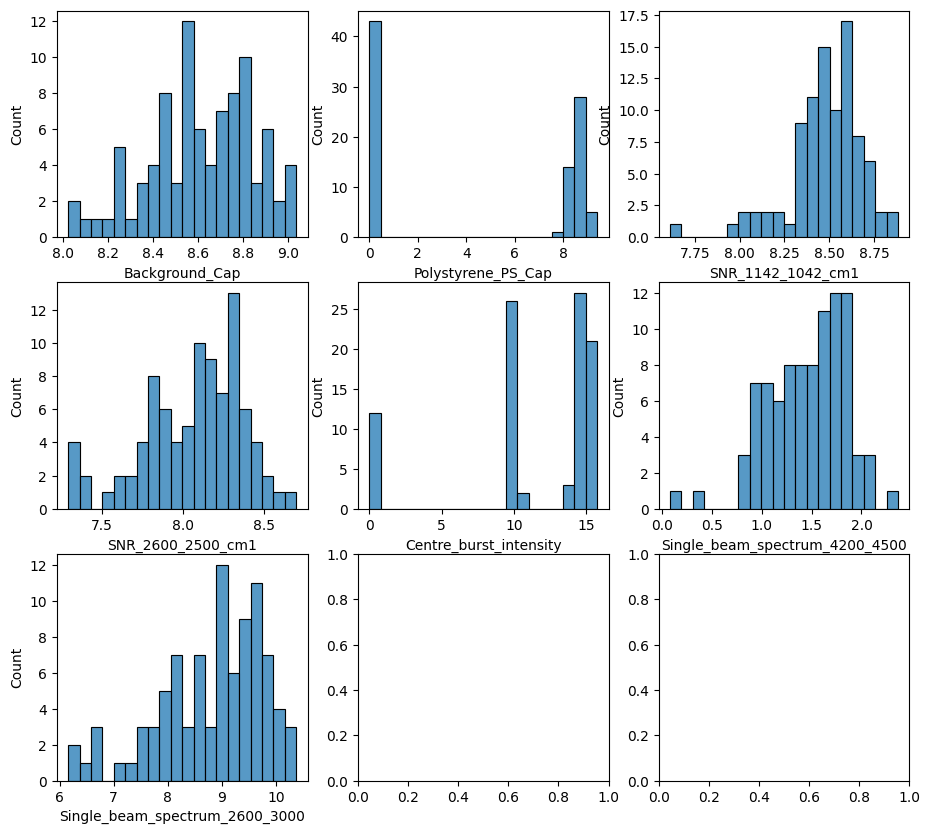

In [14]:
fig, axs = plt.subplots(3, 3, figsize=(11, 10))

sns.histplot(df_log, x='Background_Cap', ax=axs[0,0], bins=20)
sns.histplot(df_log, x='Polystyrene_PS_Cap', ax=axs[0,1], bins=20)
sns.histplot(df_log, x='SNR_1142_1042_cm1', ax=axs[0,2], bins=20)
sns.histplot(df_log, x='SNR_2600_2500_cm1', ax=axs[1,0], bins=20)
sns.histplot(df_log, x='Centre_burst_intensity', ax=axs[1,1], bins=20)
sns.histplot(df_log, x='Single_beam_spectrum_4200_4500', ax=axs[1,2], bins=20)
sns.histplot(df_log, x='Single_beam_spectrum_2600_3000', ax=axs[2,0], bins=20)
plt.show()